In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%autosave 60

Autosaving every 60 seconds


# Final Project

Can ask questions about:
- ROI (return on investment) for different bechdel scores
    - What makes a movie do well and how do bechdel scores factor into that? Look at diff. bechdel scores' ROI when controlling for factors such as budget and year
- Ratings for different bechdel scores (must combine with IMDB dataset to find ratings)
- Change in bechdel scores over time
- Do movies with lower/higher budgets have lower/higher bechdel scores?
    - what does this say about representation in more 'mainstream' movies?


Data:
- https://data.world/fivethirtyeight/bechdel
- https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

Loading in the data:

In [3]:
movies_full = pd.read_csv(filepath_or_buffer = 'C://Users/haile/DSCI 235 - wrangling/project/bechdel_movies.csv', dtype={'imdb': 'str'})
movies = movies_full.drop(columns=['test','code','period code', 'decade code'])
movies = movies.sort_values(['year'])
movies = movies.rename(columns={'intgross': 'wwgross', 'intgross_2013$': 'wwgross_2013$', 'clean_test': 'bechdel'})

In [4]:
movies = movies.sort_values('year', ascending=False)

In [5]:
metadata = pd.read_csv(filepath_or_buffer = 'C://Users/haile/DSCI 235 - wrangling/project/archive/movies_metadata.csv', dtype = {'imdb_id': 'str'}, engine='python')
metadata = metadata.drop(columns=['adult', 'belongs_to_collection', 'genres', 'homepage', 'overview', 'poster_path',
                                  'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline',
                                  'video', 'budget', 'original_language', 'original_title', 'release_date', 'revenue',
                                 'vote_count'])

I will combine these two datasets later so I can look at ratings and bechdel scores in the same dataset.

In [58]:
index2 = movies['imdb'].isin(metadata['imdb_id'])
movies_g = movies[index2]
movies_g = movies_g.sort_values('imdb')
movies_g.reset_index(inplace=True)
movies_g = movies_g.drop(columns=['title'])
movies_g

,index,year,imdb,bechdel,binary,budget,domgross,wwgross,budget_2013$,domgross_2013$,wwgross_2013$
0,1177,2001,tt0035423,men,FAIL,48000000,47095453.0,70937778.0,63160606,61970361.0,93343188.0
1,1793,1970,tt0065466,ok,PASS,1000000,9000000.0,9000000.0,5997631,53978683.0,53978683.0
2,1788,1971,tt0067065,notalk,FAIL,2500000,12300000.0,12300000.0,14386286,70780525.0,70780525.0
3,1791,1971,tt0067116,notalk,FAIL,2200000,41158757.0,41158757.0,12659931,236848653.0,236848653.0
4,1789,1971,tt0067741,notalk,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0
...,...,...,...,...,...,...,...,...,...,...,...
1778,98,2013,tt2334879,men,FAIL,150000000,73103784.0,205440387.0,150000000,73103784.0,205440387.0
1779,58,2013,tt2364841,nowomen,FAIL,30000000,19316646.0,62616646.0,30000000,19316646.0,62616646.0
1780,71,2013,tt2404311,men,FAIL,30000000,36918811.0,51078541.0,30000000,36918811.0,51078541.0
1781,76,2013,tt2404463,ok,PASS,43000000,159581587.0,230781587.0,43000000,159581587.0,230781587.0


To look at Return on Investment scores, I will add a category where I take the worldwide gross values in 2013 dollars, divide by the budget in 2013 dollars, and then multiply by 100.

In [59]:
movies_g['ROI'] = (movies_g['wwgross_2013$'] / movies_g['budget_2013$']) * 100

ROI_vs_bechdel = movies_g[['ROI', 'bechdel']]
small = movies_g[movies_g['ROI'] < 400]
#small['ROI'].hist(by=small['bechdel'], sharey=True, bins=50);
small.head()

,index,year,imdb,bechdel,binary,budget,domgross,wwgross,budget_2013$,domgross_2013$,wwgross_2013$,ROI
0,1177,2001,tt0035423,men,FAIL,48000000,47095453.0,70937778.0,63160606,61970361.0,93343188.0,147.787037
4,1789,1971,tt0067741,notalk,FAIL,53012938,70327868.0,107190108.0,305063707,404702718.0,616827003.0,202.196128
5,1790,1971,tt0067800,notalk,FAIL,25000000,10324441.0,11253821.0,143862856,59412143.0,64760273.0,45.015284
6,1792,1971,tt0067992,men,FAIL,3000000,4000000.0,4000000.0,17263543,23018057.0,23018057.0,133.333331
9,1781,1973,tt0068699,notalk,FAIL,15700000,15700000.0,15700000.0,82329139,82329139.0,82329139.0,100.000000


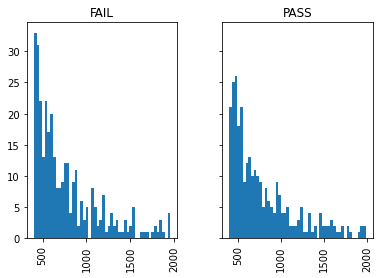

In [8]:
medium = movies_g[(movies_g['ROI'] > 399) & (movies_g['ROI'] < 2000)]
medium['ROI'].hist(by=medium['binary'], sharey = True, bins=50);

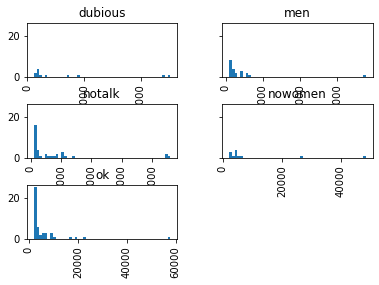

In [9]:
large = movies_g[movies_g['ROI'] > 1999]
large['ROI'].hist(by=large['bechdel'],sharey=True,bins=50);

In [10]:
index = metadata['imdb_id'].isin(movies['imdb'])
meta_g = metadata[index]
meta_g = meta_g.sort_values('imdb_id')
meta_g.reset_index(inplace=True)
meta_g

,index,id,imdb_id,popularity,runtime,title,vote_average
0,4862,11232,tt0035423,7.196356,118.0,Kate & Leopold,6.0
1,7649,5722,tt0065466,3.129943,109.0,Beyond the Valley of the Dolls,6.6
2,2420,1687,tt0067065,12.120267,98.0,Escape from the Planet of the Apes,6.3
3,1844,1051,tt0067116,6.694959,104.0,The French Connection,7.4
4,3607,482,tt0067741,3.73688,100.0,Shaft,6.5
...,...,...,...,...,...,...,...
1778,21162,117251,tt2334879,9.920223,131.0,White House Down,6.3
1779,21743,146238,tt2364841,8.864607,91.0,Runner Runner,5.5
1780,21614,112205,tt2404311,8.047735,111.0,The Family,6.1
1781,21171,136795,tt2404463,12.706403,117.0,The Heat,6.5


Now I will combine the datasets and drop redundant columns. I'm also replacing the words in the bechdel column with the corresponding score, and dropping dubious scores as they're uncertain.

In [60]:
combine = pd.concat(objs=[movies_g, meta_g], axis=1)
#combine = combine.drop(columns=['imdb_id','id','popularity'])
combine = combine[['year', 'imdb', 'bechdel', 'binary', 'budget_2013$', 'wwgross_2013$', 'ROI', 'title', 'vote_average']]
combine.head()

#fixing bechdel column
combine['bechdel'].replace(['ok', 'men', 'notalk', 'nowomen'], [3, 2, 1, 0], inplace=True)
combine = combine[combine['bechdel'] != 'dubious']
combine.head()

,year,imdb,bechdel,binary,budget_2013$,wwgross_2013$,ROI,title,vote_average
0,2001,tt0035423,2,FAIL,63160606,93343188.0,147.787037,Kate & Leopold,6.0
1,1970,tt0065466,3,PASS,5997631,53978683.0,900.000067,Beyond the Valley of the Dolls,6.6
2,1971,tt0067065,1,FAIL,14386286,70780525.0,491.999985,Escape from the Planet of the Apes,6.3
3,1971,tt0067116,1,FAIL,12659931,236848653.0,1870.852637,The French Connection,7.4
4,1971,tt0067741,1,FAIL,305063707,616827003.0,202.196128,Shaft,6.5


In [61]:
combine.groupby(['bechdel'])['vote_average'].mean()

bechdel
0    6.556835
1    6.566016
2    6.511399
3    6.382058
Name: vote_average, dtype: float64

In [62]:
bechdel_avgs = pd.DataFrame()
combine['year2'] = combine['year']
def bechdel_avg(x):
    global bechdel_avgs
    year = pd.unique(x['year2'])[0]
    score_0 = x[x['bechdel'] == 0]
    score_1 = x[x['bechdel'] == 1]
    score_2 = x[x['bechdel'] == 2]
    score_3 = x[x['bechdel'] == 3]
    toConcat = pd.DataFrame([[year, score_0['vote_average'].mean(), score_1['vote_average'].mean(),
                              score_2['vote_average'].mean(), score_3['vote_average'].mean()]],
                           columns = ['year', '0', '1', '2', '3'])
    bechdel_avgs = pd.concat([bechdel_avgs, toConcat])
    
byYear = combine.groupby(['year'])
byYear.apply(bechdel_avg)

bechdel_avgs = bechdel_avgs.reset_index()
bechdel_avgs = bechdel_avgs.drop(columns=['index'])
rec = bechdel_avgs[22:]
rec
    

,year,0,1,2,3
22,1992,7.066667,6.728571,7.100000,6.325000
23,1993,7.050000,6.450000,7.300000,7.200000
24,1994,6.466667,6.572727,6.433333,6.688889
25,1995,6.200000,6.754545,7.750000,6.441176
26,1996,5.700000,6.106667,7.100000,6.561905
27,1997,7.900000,6.700000,5.842857,6.407143
28,1998,6.666667,6.650000,6.771429,6.325000
29,1999,6.833333,6.717647,5.883333,6.573913
30,2000,6.885714,6.475000,6.300000,6.558621
31,2001,6.260000,6.847059,6.000000,6.278788


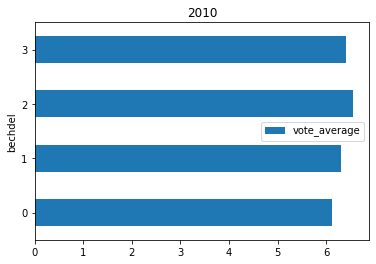

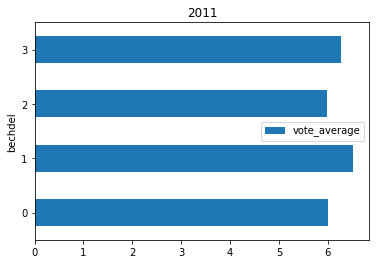

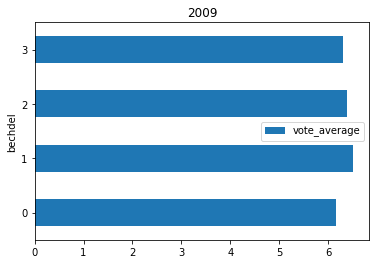

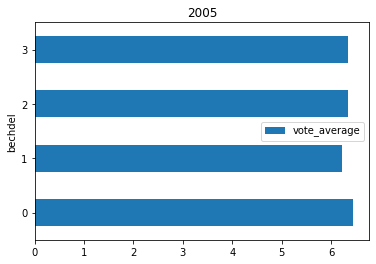

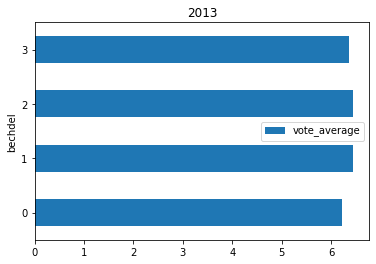

In [25]:
def ratings_bechdel(x, year):
    ratings = x.groupby('bechdel')['vote_average'].mean().reset_index()
    ratings.plot.barh(x='bechdel',y='vote_average',title=year)
    
ratings_bechdel(combine[combine['year'] == 2010], '2010')
ratings_bechdel(combine[combine['year'] == 2011], '2011')
ratings_bechdel(combine[combine['year'] == 2009], '2009')
ratings_bechdel(combine[combine['year'] == 2005], '2005')
ratings_bechdel(combine[combine['year'] == 2013], '2013')


In [26]:
combine.groupby(['bechdel'])['vote_average'].describe()

,count,mean,std,min,25%,50%,75%,max
bechdel,,,,,,,,
0,139.0,6.556835,0.858719,4.4,5.9,6.6,7.2,8.5
1,512.0,6.566016,0.772913,3.6,6.0,6.6,7.1,8.5
2,193.0,6.511399,0.728708,4.0,6.0,6.6,7.0,8.3
3,797.0,6.382058,0.752110,3.8,5.9,6.4,6.9,8.3


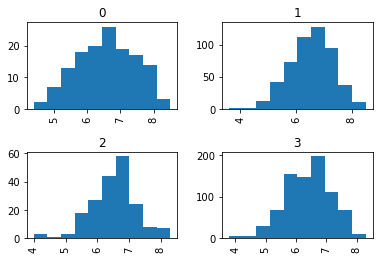

In [28]:
combine.hist(column='vote_average', by = 'bechdel');

In [35]:
hm = combine.groupby(['year', 'bechdel'])
hm['vote_average'].mean()

year  bechdel
1970  3          6.600000
1971  1          6.850000
      2          7.400000
1972  1          7.800000
      3          6.200000
                   ...   
2012  3          6.283333
2013  0          6.216667
      1          6.447826
      2          6.433333
      3          6.360870
Name: vote_average, Length: 160, dtype: float64

In [46]:
combine.head()

,year,imdb,bechdel,binary,budget_2013$,wwgross_2013$,ROI,title,vote_average,year2
0,2001,tt0035423,2,FAIL,63160606,93343188.0,194.464975,Kate & Leopold,6.0,2001
1,1970,tt0065466,3,PASS,5997631,53978683.0,5397.868300,Beyond the Valley of the Dolls,6.6,1970
2,1971,tt0067065,1,FAIL,14386286,70780525.0,2831.221000,Escape from the Planet of the Apes,6.3,1971
3,1971,tt0067116,1,FAIL,12659931,236848653.0,10765.847864,The French Connection,7.4,1971
4,1971,tt0067741,1,FAIL,305063707,616827003.0,1163.540498,Shaft,6.5,1971


In [57]:
budget_df = combine.sort_values(by='budget_2013$', ascending=False)
top = budget_df[0:55]

,year,imdb,bechdel,binary,budget_2013$,wwgross_2013$,ROI,title,vote_average,year2
1179,2009,tt0499549,2,FAIL,461435929,3.022589e+09,711.197365,Avatar,7.2,2009
1080,2007,tt0449088,3,PASS,337063045,1.079721e+09,359.907115,Pirates of the Caribbean: At World's End,6.9,2007
4,1971,tt0067741,1,FAIL,305063707,6.168270e+08,1163.540498,Shaft,6.5,1971
401,1997,tt0120338,3,PASS,290247625,3.171931e+09,1585.965486,Titanic,7.5,1997
967,2012,tt0401729,3,PASS,279025606,2.869176e+08,104.333660,John Carter,6.1,2012
1543,2012,tt1345836,1,FAIL,279025606,1.095144e+09,398.234178,The Dark Knight Rises,7.6,2012
958,2010,tt0398286,3,PASS,277740279,6.266055e+08,241.002116,Tangled,7.4,2010
1457,2013,tt1210819,1,FAIL,275000000,2.599899e+08,94.541785,The Lone Ranger,5.9,2013
1010,2009,tt0417741,3,PASS,271432899,1.014526e+09,405.810202,Harry Potter and the Half-Blood Prince,7.4,2009
836,2006,tt0348150,1,FAIL,268144752,4.517707e+08,194.728768,Superman Returns,5.4,2006
